# Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pycountry_convert as pc

# Turning parquet files into CSVs

In [ ]:
RawList = ['raw_match_parquet','raw_odds_parquet','raw_point_by_point_parquet','raw_statistics_parquet','raw_tennis_power_parquet','raw_votes_parquet']
for names in RawList:
    data_dir = Path(rf"C:\Users\Mcc\Downloads\Daneshkar\tennis_data_20231212\tennis_data_20231212\raw\{names}")
    full_df = pd.concat([pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')],axis="rows", ignore_index=True)
    full_df.to_csv(f'{names}.csv')


# Reading CSVs & Merging them together

In [2]:
df1 = pd.read_csv(r"C:\Users\Mcc\Desktop\ArmanMehmandoost_Tennis-Project\raw_match_parquet.csv").drop(columns=["Unnamed: 0"])
df2 = pd.read_csv(r"C:\Users\Mcc\Desktop\ArmanMehmandoost_Tennis-Project\raw_odds_parquet.csv").drop(columns=["Unnamed: 0"])
df3 = pd.read_csv(r"C:\Users\Mcc\Desktop\ArmanMehmandoost_Tennis-Project\raw_point_by_point_parquet.csv").drop(columns=["Unnamed: 0"])
df4 = pd.read_csv(r"C:\Users\Mcc\Desktop\ArmanMehmandoost_Tennis-Project\raw_statistics_parquet.csv").drop(columns=["Unnamed: 0"])
df5 = pd.read_csv(r"C:\Users\Mcc\Desktop\ArmanMehmandoost_Tennis-Project\raw_tennis_power_parquet.csv").drop(columns=["Unnamed: 0"])
df6 = pd.read_csv(r"C:\Users\Mcc\Desktop\ArmanMehmandoost_Tennis-Project\raw_votes_parquet.csv").drop(columns=["Unnamed: 0"])
df = pd.concat([df1,df2,df3,df4,df5,df6],ignore_index=True)

df["start_datetime"] = pd.to_datetime(df["start_datetime"], unit='s')
df["current_period_start_timestamp"] = pd.to_datetime(df["current_period_start_timestamp"], unit='s')

# Data imputation

### This code snippet performs data imputation to fill missing values in the DataFrame. It follows these steps:

1. Sorts the DataFrame by 'match_id' in ascending order.
2. Fills missing values in the 'gender' column using forward fill method (`ffill()`).
3. Fills missing values in the 'match_slug' column using forward and backward fill methods (`ffill()` and `bfill()`).
4. Fills missing values in the 'winner_code' column using forward and backward fill methods.
5. Fills missing values in the 'start_datetime' column using forward and backward fill methods.

This process ensures that missing values in the specified columns are filled appropriately, enhancing the completeness and usability of the dataset for further analysis.


In [3]:
#Filling Genders
df = df.sort_values(by=['match_id'], ascending=True)
df['gender'] = df['gender'].ffill()

#Filling match_slug
match_slug_fullfilled_f = df.groupby('match_id')['match_slug'].ffill()
df['match_slug'] = match_slug_fullfilled_f
match_slug_fullfilled_b = df.groupby('match_id')['match_slug'].bfill()
df['match_slug'] = match_slug_fullfilled_b

#Filling winner_code
winner_code_fullfilled_f = df.groupby('match_id')['winner_code'].ffill()
df['winner_code'] = winner_code_fullfilled_f
winner_code_fullfilled_b = df.groupby('match_id')['winner_code'].bfill()
df['winner_code'] = winner_code_fullfilled_b

#Filling start_datetime
start_datetime_fullfilled_f = df.groupby('match_id')['start_datetime'].ffill()
df['start_datetime'] = start_datetime_fullfilled_f
start_datetime_fullfilled_b = df.groupby('match_id')['start_datetime'].bfill()
df['start_datetime'] = start_datetime_fullfilled_b

#Filling Genders
# genders_fullfilled_f = df.groupby('match_id')['gender'].ffill()
# df['gender'] = genders_fullfilled_f
# genders_fullfilled_b = df.groupby('match_id')['gender'].bfill()
# df['gender'] = genders_fullfilled_b

# #Filling Round_ids
# round_id_fullfilled_f = df.groupby('match_id')['round_id'].ffill()
# df['round_id'] = round_id_fullfilled_f
# round_id_fullfilled_b = df.groupby('match_id')['round_id'].bfill()
# df['round_id'] = round_id_fullfilled_b



# Q1: Total Number of Tennis Players Mentioned in the Database

### Analysis of Total Number of Tennis Players

This code snippet calculates the total number of unique tennis players present in the dataset. It performs the following steps:

1. Counts the number of unique entries in the 'full_name' column, representing individual tennis players.
2. Prints the total number of unique tennis players in the dataset.

This analysis provides insight into the breadth of player representation within the dataset, indicating the diversity of tennis players included in the analysis.


In [5]:
number_of_tennis_players = df['full_name'].nunique()
number_of_tennis_players

596

# Q2: Average year of the players going Pro

### Analysis of Average Professional Career Duration in Tennis Players

This code snippet calculates the average professional career duration for tennis players in the dataset. It performs the following steps:

1. Removes duplicate entries based on the 'full_name' column to obtain a dataframe with unique player names.
2. Groups the unique player data by player name and calculates the mean turned professional year for each player.
3. Computes the overall average of the mean turned professional years across all players.
4. Prints the average professional career duration rounded to the nearest integer.

This analysis provides insight into the typical length of professional careers among tennis players in the dataset, indicating the average number of years players have spent in their professional careers.


In [6]:
df_unique_names = df.drop_duplicates(subset='full_name')
avg_pro_year_per_player = df_unique_names.groupby('full_name')['turned_pro'].mean().mean()
print(int(avg_pro_year_per_player))


2012


# Q3: Which player has the highest number of Wins

### This code segment performs several operations on tennis match data to identify the player with the highest number of wins.

1. The 'match_slug' column is split to extract home and away player names.
2. Home and away player names are assigned to respective columns, capitalized for consistency.
3. A new DataFrame containing unique match IDs is created to avoid duplicate entries.
4. The winner name for each match is determined based on the 'winner_code' column.
5. The number of wins for each player is calculated.
6. Finally, the player with the highest number of wins and the corresponding win count are printed.

This analysis offers insight into which tennis player has achieved the most victories in the dataset.


In [7]:
# Split 'match_slug' column to extract home and away player names
split_slug = df['match_slug'].str.split('-', expand=True)
df['home_player'] = split_slug[0].str.capitalize()
df['away_player'] = split_slug[1].str.capitalize()
unique_matches_df = df.drop_duplicates(subset='match_id')

unique_matches_df['winner_name'] = np.where(unique_matches_df['winner_code'] == 2,
                                            unique_matches_df['home_player'],
                                            unique_matches_df['away_player'])
win_counts_per_player = unique_matches_df["winner_name"].value_counts()
player_with_most_wins = win_counts_per_player.idxmax()
most_wins = win_counts_per_player.max()

print(f"The player with the highest number of wins is: {player_with_most_wins}, with {most_wins} wins.")



The player with the highest number of wins is: Fernandez, with 4 wins.


C:\Users\Mcc\AppData\Local\Temp\ipykernel_21308\3326112439.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_matches_df['winner_name'] = np.where(unique_matches_df['winner_code'] == 2,


# Q4: What is the longest match recorded in terms of duration

### Analysis of Longest Tennis Match Duration

This code snippet identifies the longest recorded tennis match duration in the dataset. It performs the following steps:

1. Filters the dataframe to include only matches where the duration of each period (period_1, period_2, period_3) is greater than 60 minutes.
2. Converts the durations from seconds to minutes.
3. Calculates the total duration of each match by summing the durations of all periods.
4. Rounds the total match duration to the nearest minute.
5. Assigns the total match duration to a new column 'match_duration' in the dataframe.
6. Determines the longest match recorded by finding the maximum value of match durations.
7. Prints the longest match recorded in terms of duration, providing insight into the duration extremes observed in tennis matches.

This analysis offers valuable information about the duration distribution of tennis matches in the dataset, highlighting the outlier of the longest recorded match.


In [8]:
df_filtered= df[df[['period_1', 'period_2', 'period_3']].min(axis=1) > 60]
periods_in_seconds = df_filtered[['period_1', 'period_2', 'period_3']] / 60 
df_filtered['total_duration'] = periods_in_seconds.sum(axis=1).round(0)
df["match_duration"] = df_filtered["total_duration"]
longest_match_recorded = df["match_duration"].max()
print(f"The Longest Match recorded in terms of duration is {longest_match_recorded} minutes")


The Longest Match recorded in terms of duration is 214.0 minutes


C:\Users\Mcc\AppData\Local\Temp\ipykernel_21308\59348952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_duration'] = periods_in_seconds.sum(axis=1).round(0)


C:\Users\Mcc\AppData\Local\Temp\ipykernel_21308\3101569413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_duration'] = periods_in_minutes.sum(axis=1).round(0)
c:\Users\Mcc\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


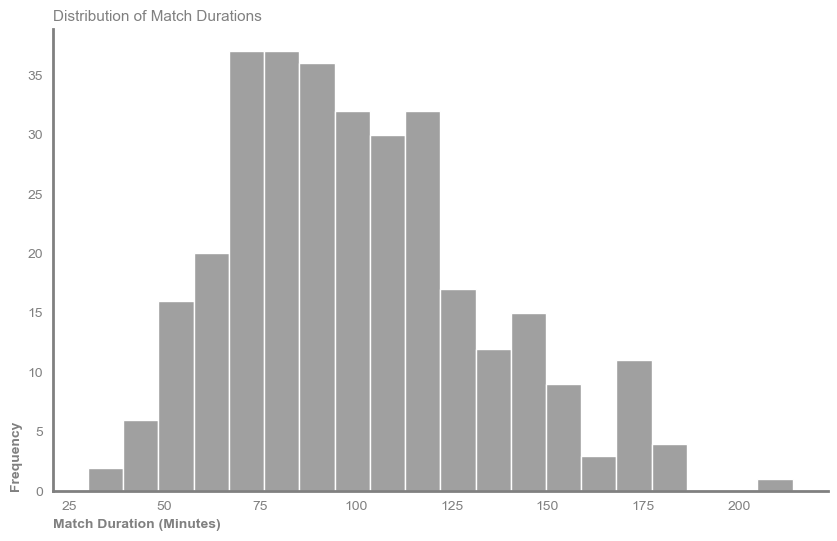

The Longest Match recorded in terms of duration is 214.0 minutes


In [10]:
sns.set_style("white")
df_filtered = df[df[['period_1', 'period_2', 'period_3']].min(axis=1) > 60]
periods_in_minutes = df_filtered[['period_1', 'period_2', 'period_3']] / 60
df_filtered['total_duration'] = periods_in_minutes.sum(axis=1).round(0)
longest_match_recorded = df_filtered['total_duration'].max()
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['total_duration'], bins=20, color='grey')
plt.title("Distribution of Match Durations", color='grey', loc='left', fontsize=11)
plt.xlabel("Match Duration (Minutes)", color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel("Frequency", color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
plt.show()
print(f"The Longest Match recorded in terms of duration is {longest_match_recorded} minutes")


# Q5: How many sets are typically played in a tennis match

#### This code calculates the average number of sets typically played in a tennis match.The DataFrame is grouped by 'match_id', and the 'current_score' for each match is summed up. Then, the mean value of these summed scores is calculated to determine the average number of sets played in a tennis match. The result is rounded to two decimal places.The output provides insight into the average number of sets expected in a typical tennis match based on the dataset.


In [11]:
sets_typically_played_in_a_tennis_match = df.groupby("match_id")["current_score"].sum().mean().round(2)
print(f"Average sets typically played in a tennis match is: {sets_typically_played_in_a_tennis_match}")

Average sets typically played in a tennis match is: 2.16


# Q6: Which country has produced the most successful tennis players

### This code segment analyzes tennis data to identify the most successful countries based on two metrics: current rank and total prize money.

1. The DataFrame is grouped by 'country', and for each country, the minimum current rank and total prize money of players are aggregated.
2. The resulting statistics are sorted in descending order based on total prize money, and the top countries are selected.
3. A new column 'num_players' is added to store the number of unique players for each country.
4. The columns are renamed to provide clearer labels.
5. Finally, the DataFrame containing information about the most successful countries, including minimum rank, total prize money, and number of players, is printed.

This analysis offers insights into which countries have achieved the most success in tennis, considering player rankings, prize earnings, and player count.


In [12]:
country_stats = df.groupby('country').agg({'current_rank': 'min','total_prize': 'sum'})
most_successful_countries = country_stats.sort_values(by='total_prize', ascending=False).head()

most_successful_countries['num_players'] = [df[df['country'] == country]['player_id'].nunique() for country in most_successful_countries.index]
most_successful_countries.rename(columns={'current_rank': 'Minimum Rank', 'total_prize': 'Total Prize', 'num_players': 'Number of Players'}, inplace=True)
most_successful_countries


,Minimum Rank,Total Prize,Number of Players
country,,,
Czech Republic,7.0,108283607.0,20
Russia,3.0,75538287.0,27
Germany,7.0,64748759.0,27
France,20.0,62567084.0,59
USA,3.0,55850967.0,44


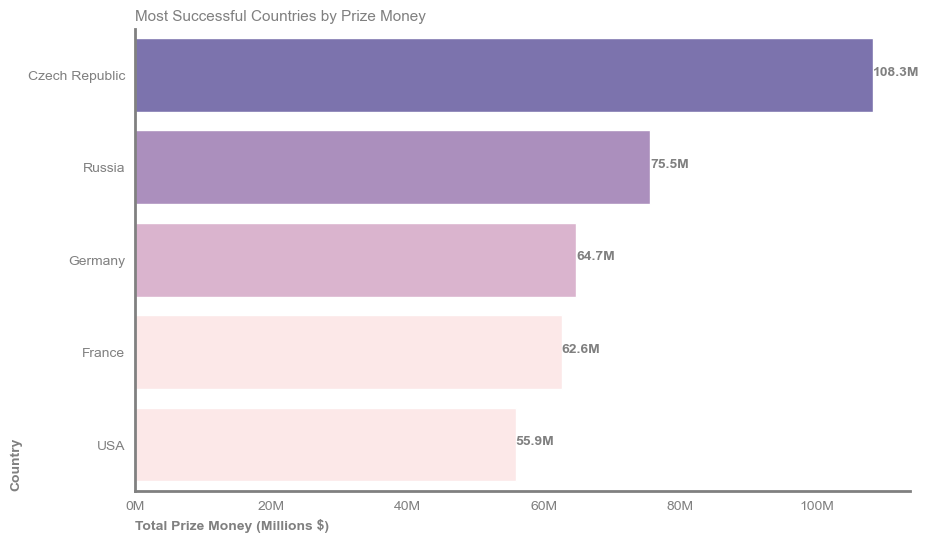

In [13]:
sns.set_style("white")
most_successful_countries['Total Prize (Millions)'] = most_successful_countries['Total Prize'] / 1000000

# Define colors for each country
# country_colors = {
#     'Country1': '#DDE6ED',  # Light Blue
#     'Country3': '#9DB2BF',  # Light Grayish Blue
#     'Country2': '#526D82',  # Slate Gray
#     'Country4': '#27374D',  # Dark Slate Gray
#     'Country5': '#0F1035'   # Darkest Blue
# }

country_colors = {
    'Country1': '#FFE5E5',
    'Country3': '#FFE5E5', 
    'Country2': '#E0AED0', 
    'Country4': '#AC87C5', 
    'Country5': '#756AB6'  
}
reversed_colors = list(reversed(list(country_colors.values())))
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Total Prize (Millions)', y=most_successful_countries.index, data=most_successful_countries, 
            palette=reversed_colors)

for index, value in enumerate(most_successful_countries['Total Prize (Millions)']):
    ax.text(value, index, f'{value:.1f}M', ha='left', color='grey', fontsize=10, fontweight='bold')

plt.title("Most Successful Countries by Prize Money", color='grey', loc='left', fontsize=11)
plt.xlabel('Total Prize Money (Millions $)', color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel('Country', color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))
sns.despine()
plt.grid(False)
plt.gcf().set_facecolor('white')
plt.show()


# Q7: What is the average number of aces per match

### This code snippet calculates the average number of aces per tennis match based on the provided dataset.

1. The 'home_stat' and 'away_stat' columns are converted to numeric data types, with errors coerced to NaN.
2. The total number of unique matches is determined.
3. Rows related to 'aces' statistics in the 'ALL' period are filtered.
4. Total points per match are calculated by summing up aces from both home and away players.
5. The average number of aces per match is computed by summing up all aces across matches and dividing by the total number of matches.
6. The result is printed, providing insight into the average number of aces expected per tennis match.


In [14]:
df['home_stat'] = pd.to_numeric(df['home_stat'], errors='coerce')
df['away_stat'] = pd.to_numeric(df['away_stat'], errors='coerce')

total_matches = len(df['match_id'].unique())
total_points_per_match = df[(df['period'] == 'ALL') & (df['statistic_name'] == 'aces')]

df['aces_all_points'] = total_points_per_match['home_stat'] + total_points_per_match['away_stat']

average_aces_per_match = df[(df['statistic_name'] == 'aces') & (df['period'] == 'ALL')]['aces_all_points'].sum()
average_aces_per_match = average_aces_per_match / total_matches
print("Average number of aces per match:", average_aces_per_match.round(2))


Average number of aces per match: 1.1


# Q8: Is there a difference in the number of double faults based on gender?

### This code segment computes the average number of double faults made by male and female tennis players and compares their likelihood of committing a double fault.

1. The 'home_stat' and 'away_stat' columns are coerced to numeric data types, converting errors to NaN.
2. Double faults statistics for all periods are aggregated.
3. The total number of double faults per match is calculated by summing up double faults from both home and away players.
4. The average number of double faults for male and female players is computed separately.
5. The results are rounded to two decimal places and printed, providing insights into the typical number of double faults for each gender.
6. Additionally, the ratio of the average number of double faults for female players compared to male players is calculated and printed, indicating the relative likelihood of female players committing a double fault compared to male players.


In [15]:
df['home_stat'] = pd.to_numeric(df['home_stat'], errors='coerce')
df['away_stat'] = pd.to_numeric(df['away_stat'], errors='coerce')

double_faults_agg = df[(df['statistic_name'] == 'double_faults') & (df['period'] == 'ALL')]
df['double_faults_all_points'] = double_faults_agg['home_stat'] + double_faults_agg['away_stat']

average_double_faults_male = df[(df['statistic_name'] == 'double_faults') & (df['gender'] == 'M')]['double_faults_all_points'].mean().round(2)
average_double_faults_female = df[(df['statistic_name'] == 'double_faults') & (df['gender'] == 'F')]['double_faults_all_points'].mean().round(2)
print("Average number of double faults for male players:", average_double_faults_male)
print("Average number of double faults for female players:", average_double_faults_female)

average_double_faults_difference = (average_double_faults_female / average_double_faults_male).round(2)
print("Female players chance of making a double fualts is", average_double_faults_difference, "Times More than Men!")

Average number of double faults for male players: 5.62
Average number of double faults for female players: 7.73
Female players chance of making a double fualts is 1.38 Times More than Men!


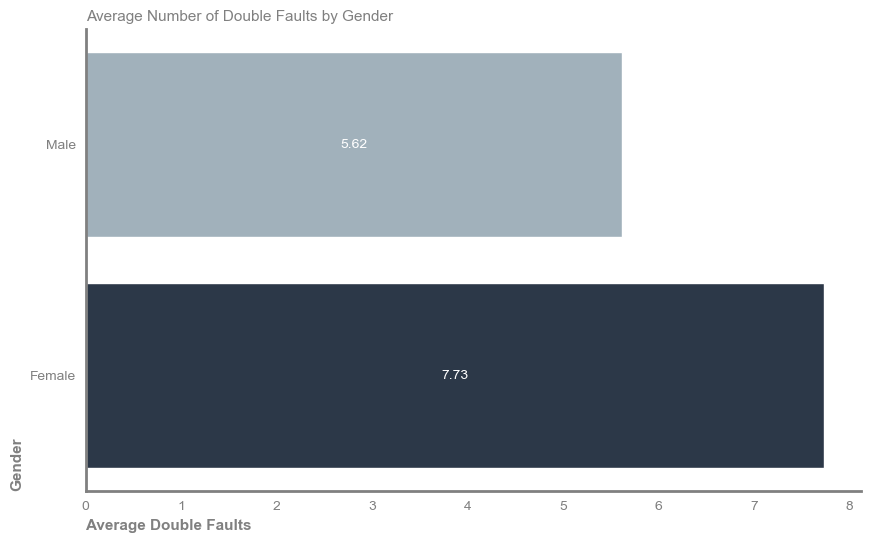

In [16]:
data = {
    'Gender': ['Male', 'Female'],
    'Average Double Faults': [average_double_faults_male, average_double_faults_female]
}
df_plot = pd.DataFrame(data)
sns.set_style("white")
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Average Double Faults', y='Gender', data=df_plot, palette={'Male': '#9DB2BF', 'Female': '#27374D'})
plt.title('Average Number of Double Faults by Gender', color='grey', loc='left', fontsize=11)
plt.xlabel('Average Double Faults', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Gender', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
for bar, avg in zip(bars.patches, df_plot['Average Double Faults']):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{avg:.2f}', 
             ha='center', va='center', color='white')
plt.show()


# Q9: Which player has won the most tournaments in a single month

### This code segment processes tennis match data to identify players who have won at least one tournament in each month.

1. The start datetime column is converted to datetime format, and the month component is extracted.
2. The match slug is split to separate home and away player names.
3. The winner and loser of each match are determined based on the winner code.
4. Matches are filtered to include only final wins (round_id = 29).
5. Tournament wins for each player in each month are counted.
6. Players who have won at least one tournament in each month are filtered.
7. The resulting DataFrame contains information about players who have achieved consistent tournament wins across all months, indicating their dominance throughout the year.

This analysis offers insights into players' consistent performance and success in winning tournaments across different months.


In [5]:
df['start_datetime'] = pd.to_datetime(df['start_datetime'])
df['month'] = df['start_datetime'].dt.month
split_slug = df['match_slug'].str.split('-', expand=True)
df['home_player'] = split_slug[0]
df['away_player'] = split_slug[1]
df['winner_name'] = np.where(df['winner_code'] == 2, df['home_player'], df['away_player'])
df['loser_name'] = np.where(df['winner_code'] == 1, df['home_player'], df['away_player'])
final_winners = df[df['round_id'] == 29]
winner_counts = final_winners.groupby(['month', 'winner_name']).size().reset_index(name='wins')
players_with_at_least_one_win = winner_counts[winner_counts['wins'] > 0]
print(players_with_at_least_one_win)


    month winner_name  wins
0      10   ajdukovic     1
1      10     ambrogi     1
2      10  bartunkova     1
3      10      biolay     1
4      10         cid     1
5      10       draxl     1
6      10     estable     1
7      10     feistel     1
8      10      gaubas     1
9      10    guerrero     1
10     10     kuzmova     1
11     10      machac     1
12     10       milev     1
13     10      parker     1
14     10     paulson     1
15     10      pegula     1
16     10       ruzic     1
17     10    shelbayh     1
18     10     stewart     1
19     10     tirante     1
20     10    townsend     1
21     10        yang     1


# Q10: Is there a correlation between a player's height and their ranking

### This code snippet calculates the correlation between a player's height and their ranking in tennis. It performs the following steps:

1. Computes the correlation coefficient between the 'height' and 'current_rank' columns in the dataset.
2. Rounds the correlation coefficient to two decimal places.
3. Prints the correlation coefficient, indicating the strength and direction of the relationship between player height and ranking.

This analysis provides insight into whether there exists a significant correlation between a player's physical attributes (height) and their performance (ranking) in tennis.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


the correlation between a players height & their ranking is: 0.03


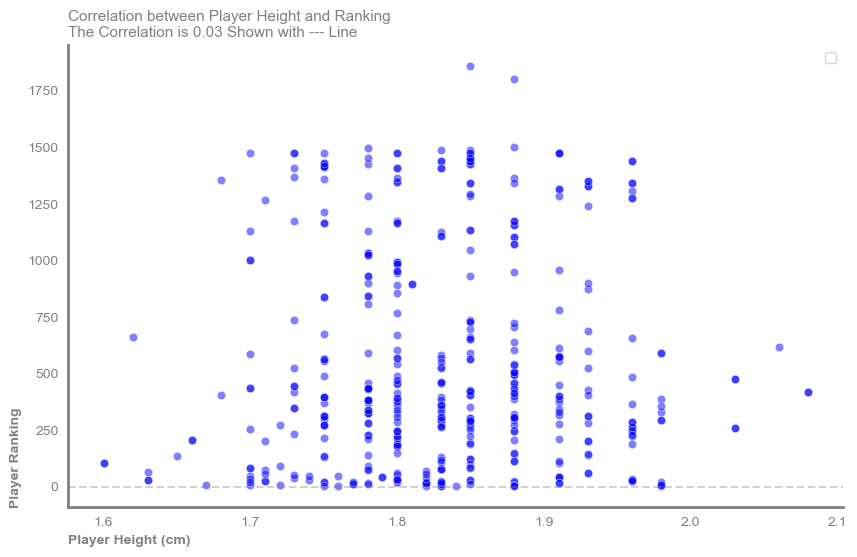

In [18]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='current_rank', data=df, alpha=0.5,color= 'blue')
correlation = df['height'].corr(df['current_rank'])
print(f'the correlation between a players height & their ranking is: {correlation.round(2)}')
plt.axhline(y=correlation, color='grey', linestyle='--', alpha= 0.35)
plt.title("Correlation between Player Height and Ranking\nThe Correlation is 0.03 Shown with --- Line", color='grey', loc='left', fontsize=11)
plt.xlabel('Player Height (cm)', color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel('Player Ranking', color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.grid(False)
plt.gcf().set_facecolor('white')
plt.legend()
plt.show()


# Q11: What is the average duration of matches

### This code snippet analyzes the duration of tennis matches based on the provided dataset. It performs the following steps:

1. Filters matches with a minimum duration exceeding 60 minutes.
2. Converts match durations from seconds to minutes.
3. Calculates the total duration for each match and stores it in a new column named 'match_duration'.
4. Computes the average duration of matches and prints the result, providing insight into the typical length of tennis matches in the dataset.


In [19]:
df_filtered= df[df[['period_1', 'period_2', 'period_3']].min(axis=1) > 60]
periods_in_seconds = df_filtered[['period_1', 'period_2', 'period_3']] / 60 
df_filtered['total_duration'] = periods_in_seconds.sum(axis=1)
df["match_duration"] = df_filtered["total_duration"]
average_duration_of_matches = df["match_duration"].mean().round(2)
print(f"The Average duration of Matches is: {average_duration_of_matches} minutes")

The Average duration of Matches is: 100.4 minutes


C:\Users\Mcc\AppData\Local\Temp\ipykernel_21308\3192266168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_duration'] = periods_in_seconds.sum(axis=1)


# Q12: What is the average number of games per set in men's matches compared to women's matches

In [20]:
# Create a copy of the DataFrame
match_set = df.copy()
match_set_no = match_set.groupby(['match_id', 'set_num'], as_index=False)\
                        .agg(game_num_per_set=('game_num', 'max'),\
                             set_num_per=('set_num', 'nunique'),\
                             break_num_per_set=('break_occurred', 'sum'))

# Find the total number of games and sets per match
match_set_no = match_set_no.groupby('match_id', as_index=False)\
                           .agg(game_num_per_match=('game_num_per_set', 'sum'),\
                                 set_num_per_match=('set_num_per', 'sum'),\
                                 break_num_per_match=('break_num_per_set', 'sum'))

# Find the mean of games per set for each match and put it in a new column named 'ave_num_games_per_set'
match_set_no['ave_num_games_per_set'] = match_set_no['game_num_per_match'] / match_set_no['set_num_per_match']

# Add a new column to our table containing gender by merging
match_set_no_gender = match_set_no.merge(df[['match_id', 'gender']], on='match_id', how='left')

# Group by gender and find the mean of 'ave_num_games_per_set' per gender
match_set_no_gender.groupby('gender')['ave_num_games_per_set'].mean().round(2)


gender
F    8.99
M    9.33
Name: ave_num_games_per_set, dtype: float64

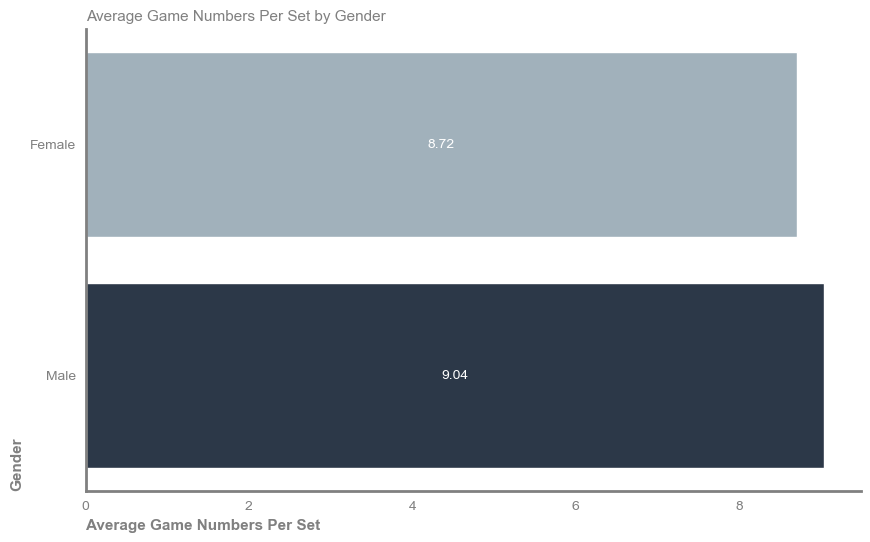

In [21]:
#Plotting
data = {
    'Gender': ['Female','Male'],
    'Average Game Numbers Per Set': [8.715278,9.035897]
}
df_plot = pd.DataFrame(data)
sns.set_style("white")
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Average Game Numbers Per Set', y='Gender', data=df_plot, palette={'Male': '#27374D', 'Female':'#9DB2BF' })
plt.title('Average Game Numbers Per Set by Gender', color='grey', loc='left', fontsize=11)
plt.xlabel('Average Game Numbers Per Set', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Gender', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
for bar, avg in zip(bars.patches, df_plot['Average Game Numbers Per Set']):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{avg:.2f}', 
             ha='center', va='center', color='white')

plt.show()

# Q13: What is the distribution of left-handed versus right-handed players

### This code snippet analyzes the distribution of left-handed and right-handed tennis players based on the provided dataset. It performs the following steps:

1. Removes duplicate entries based on player ID to ensure accuracy in counting.
2. Counts the number of left-handed and right-handed players.
3. Calculates the total number of players and the percentage distribution of left-handed and right-handed players.
4. Prints the counts and distributions of left-handed and right-handed players, providing insights into the prevalence of each handedness among tennis players.


Number of left-handed players: 32
Number of right-handed players: 244
Distribution of left-handed players: 11.59%
Distribution of right-handed players: 88.41%


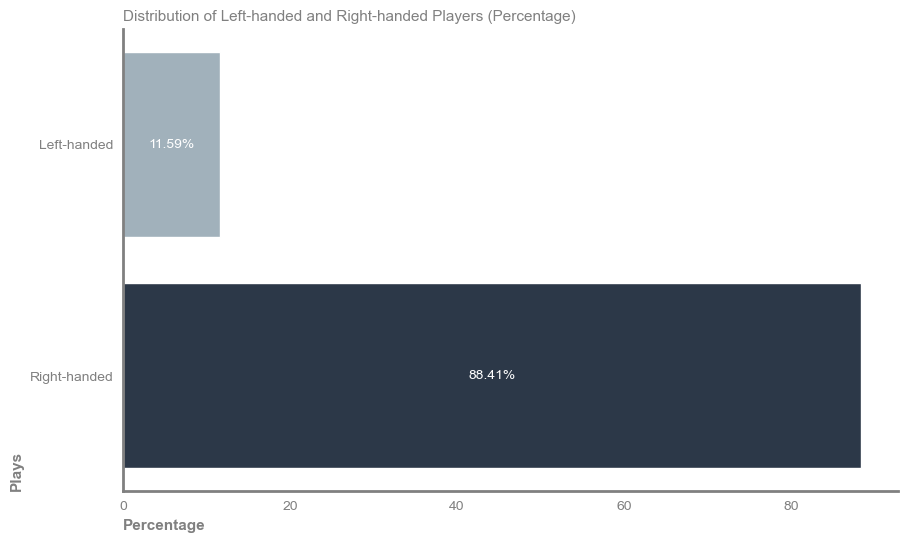

In [22]:
df_no_duplicates = df.drop_duplicates(subset='player_id')
left_handed_count = (df_no_duplicates['plays'] == 'left-handed').sum()
right_handed_count = (df_no_duplicates['plays'] == 'right-handed').sum()
print("Number of left-handed players:", left_handed_count)
print("Number of right-handed players:", right_handed_count)

total_players = left_handed_count + right_handed_count
left_handed_distribution = (left_handed_count / total_players) * 100
right_handed_distribution = (right_handed_count / total_players) * 100
print("Distribution of left-handed players: {:.2f}%".format(left_handed_distribution))
print("Distribution of right-handed players: {:.2f}%".format(right_handed_distribution))



# Plotting
sns.set_style("white")
data = {'Plays': ['Left-handed', 'Right-handed'],
        'Percentage': [left_handed_distribution, right_handed_distribution]}
df_plot = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Percentage', y='Plays', data=df_plot, palette={'Left-handed': '#9DB2BF', 'Right-handed': '#27374D'})
plt.title('Distribution of Left-handed and Right-handed Players (Percentage)', color='grey', loc='left', fontsize=11)
plt.xlabel('Percentage', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Plays', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
for bar, percentage in zip(bars.patches, df_plot['Percentage']):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', 
             ha='center', va='center', color='white')

plt.show()


# Q14: What is the most common type of surface used in tournaments

### This code snippet analyzes the distribution of tournament ground types based on unique tournament IDs in the provided dataset. It performs the following steps:

1. Removes duplicate entries based on tournament ID to ensure accuracy in counting.
2. Groups the data by ground type and counts the number of tournaments for each ground type.
3. Sorts the ground types based on the count of tournaments in descending order.
4. Prints the count of tournaments for each ground type.
5. Identifies the most common ground type(s) by finding the ground type(s) with the highest count of tournaments.

This analysis provides insights into the distribution of tournament ground types and highlights the most commonly used ground types in the dataset.


In [23]:
unique_tournoment_id = df.drop_duplicates(subset='tournament_id')
ground_type_count = unique_tournoment_id.groupby('ground_type')['tournament_id'].count()
ground_type_count= ground_type_count.sort_values(ascending=False)
print(ground_type_count ,"\n")
max_count = ground_type_count.max()
most_common_ground_types = ground_type_count[ground_type_count == max_count]


ground_type
Hardcourt outdoor    23
Red clay             23
Hardcourt indoor      6
Carpet indoor         1
Synthetic outdoor     1
Name: tournament_id, dtype: int64 



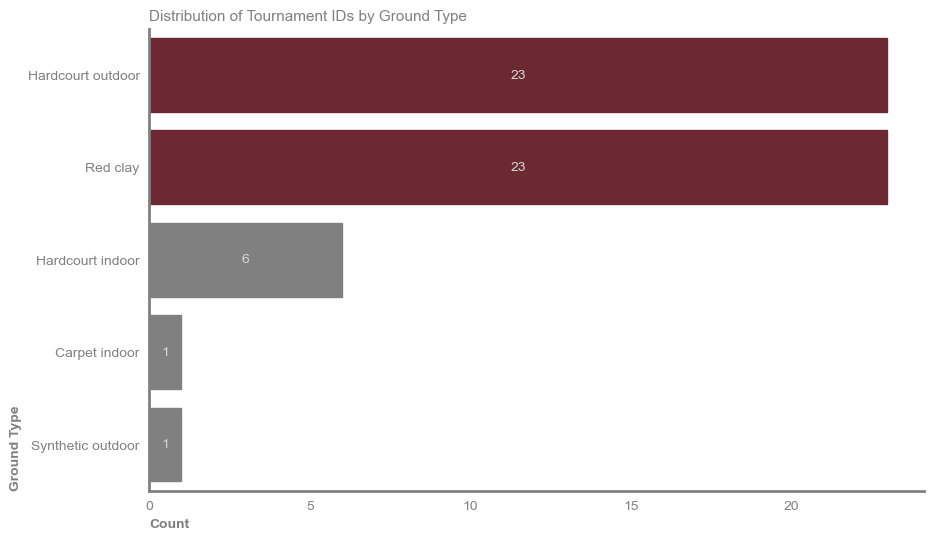

The most common ground type are: ['Hardcourt outdoor', 'Red clay']


In [24]:
unique_tournament_id = df.drop_duplicates(subset='tournament_id')
ground_type_count = unique_tournament_id.groupby('ground_type')['tournament_id'].count()
ground_type_count = ground_type_count.sort_values(ascending=False)
max_count = ground_type_count.max()
most_common_ground_types = ground_type_count[ground_type_count == max_count]

# Plotting
sns.set_style("white")
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=ground_type_count.values, y=ground_type_count.index, palette='viridis')
for bar in bars.patches:
    if bar.get_width() == max_count:
        bar.set_color('#6D2932')
    else:
        bar.set_color('grey') 
plt.title('Distribution of Tournament IDs by Ground Type', color='grey', loc='left', fontsize=11)
plt.xlabel('Count', color='grey', fontsize=10, fontweight='bold', loc='left')
plt.ylabel('Ground Type', color='grey', fontsize=10, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
for bar, count in zip(bars.patches, ground_type_count.values):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{count}', 
             ha='center', va='center', color='lightgrey') 
    
sns.despine()
plt.gcf().set_facecolor('white')
plt.show()
print("The most common ground type are:", most_common_ground_types.index.tolist())


# Q15: How many distinct countries are represented in the dataset

### This code snippet determines the number of distinct countries represented in the dataset. It performs the following steps:

1. Calculates the number of unique countries present in the dataset based on the 'country' column.
2. Prints the count of distinct countries represented in the dataset.

This analysis provides insight into the diversity of countries represented in the dataset, indicating the breadth of geographical coverage in the data.


In [25]:
distinct_countries = df['country'].nunique()
print("Number of distinct countries represented in the dataset is:", distinct_countries)

Number of distinct countries represented in the dataset is: 71


# Q16: Which player has the highest winning percentage against top 10 ranked opponents

### This code snippet identifies players who have achieved the most wins against top 10 ranked players in tennis matches. It performs the following steps:

1. Splits the 'slug' column to extract player names.
2. Filters the dataset to include only matches where the current rank is within the top 10.
3. Creates a new column 'top_10_names' to store player names.
4. Filters out matches where the winner is also within the top 10, leaving only matches where the winner is ranked outside the top 10.
5. Counts the number of wins against top 10 ranked players for each player.
6. Identifies players with the most wins against top 10 ranked players.
7. Prints the players with the most wins against top 10 ranked players and the corresponding number of wins.

This analysis provides insight into players who have achieved significant success against top-ranked opponents, indicating their prowess in challenging elite competition.


In [26]:
split_slug = df['slug'].str.split('-', expand=True)
top_10_normal = df[df['current_rank'] <= 10]
top_10_normal['top_10_names'] = split_slug[0]
top_10_beaters = top_10_normal[top_10_normal['top_10_names'] != top_10_normal['winner_name']]

winner_counts = top_10_beaters['winner_name'].value_counts()
players_with_most_wins = winner_counts[winner_counts == winner_counts.max()]
print("Players with the most wins against top 10 ranked players:")
for player, wins in players_with_most_wins.items():
    print(f"{player} has {wins} wins.")



Players with the most wins against top 10 ranked players:
humbert has 1 wins.
musetti has 1 wins.
ruud has 1 wins.
fokina has 1 wins.
kenin has 1 wins.
zheng has 1 wins.
andreeva has 1 wins.
krueger has 1 wins.


C:\Users\Mcc\AppData\Local\Temp\ipykernel_21308\2881386616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_normal['top_10_names'] = split_slug[0]


# Q17: What is the average number of breaks of serve per match

### This code snippet analyzes the average number of breaks of serve per match in tennis matches. It performs the following steps:

1. Filters the dataframe to include only entries related to 'break_points_converted'.
2. Groups the data by match ID and counts the number of breaks in each match.
3. Calculates the average number of breaks of serve per match.
4. Prints the average number of breaks of serve per match.

This analysis provides insight into the frequency of breaks of serve in tennis matches, indicating the competitiveness and intensity of matches.


In [27]:
breaks_df = df[df['statistic_name'] == 'break_points_converted']
breaks_per_match = breaks_df.groupby('match_id').size()
average_breaks_per_match = breaks_per_match.mean().round(2)

print("Average number of breaks of serve per match:", average_breaks_per_match)


Average number of breaks of serve per match: 3.31


# Extra Q1: What is the correlation between a player going pro age & their current rank

In [28]:
#Dropping duplicate players & removing empty values from turned_pro & limitinmg the players to the ranks below 1000
df = df.drop_duplicates(subset='name_code')
df.dropna(subset=['turned_pro'], inplace=True)
df = df[df['current_rank'] < 100]

#Fillout Weight Empty Values with the Median of weight
weight_median = df['weight'].median()
df['weight'].fillna(weight_median, inplace=True)

#Turning Right & left handed column to numeric
df['plays_numeric'] = df['plays'].map({'right-handed': 1, 'left-handed': 2})
df['gender_numeric'] = df['gender'].map({'M': 1, 'F': 2})

correlation_turned_pro_current_rank = df['turned_pro'].corr(df['current_rank'])
correlation_total_prize = df['total_prize'].corr(df['current_rank'])
correlation_r_l_plays = df['plays_numeric'].corr(df['current_rank'])
correlation_weight = df['weight'].corr(df['current_rank'])
average_rank_by_country = df.groupby('country')['current_rank'].mean()
correlation_country = average_rank_by_country.corr(df.groupby('country')['current_rank'].count())


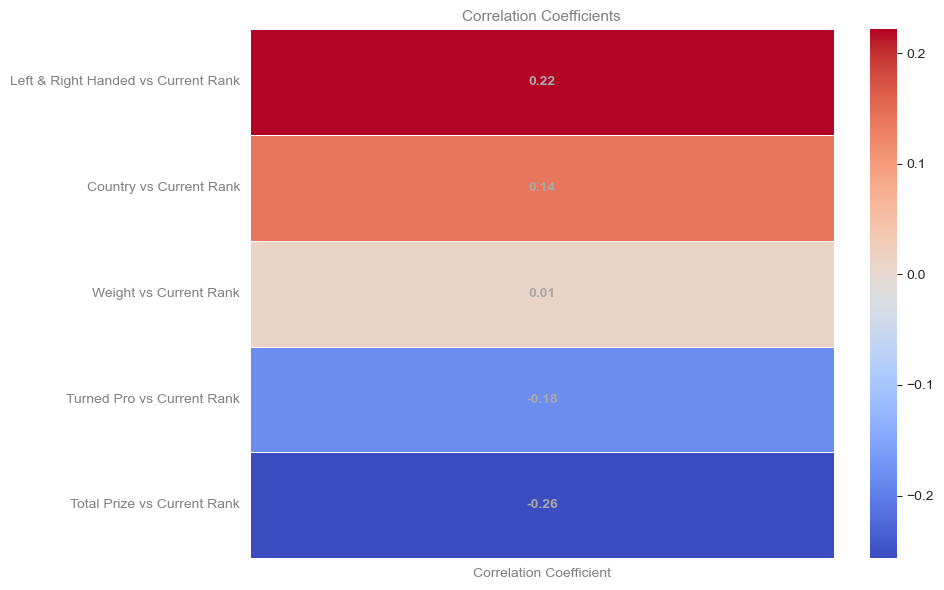

In [29]:
correlation_data = {
    'Left & Right Handed vs Current Rank': correlation_r_l_plays,
    'Country vs Current Rank': correlation_country,
    'Weight vs Current Rank': correlation_weight,
    'Turned Pro vs Current Rank': correlation_turned_pro_current_rank,
    'Total Prize vs Current Rank': correlation_total_prize
}

correlation_df = pd.DataFrame(list(correlation_data.items()), columns=['Correlation Pair', 'Correlation Coefficient'])
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.set_index('Correlation Pair'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"color": "darkgrey", "fontweight": "bold"})

plt.title('Correlation Coefficients', color='grey', fontsize=11)
plt.ylabel('')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
plt.tight_layout()
plt.show()


# Extra Q2: Which year in the data has the highest number of turned professional players

### This code snippet analyzes which year in dataset has most statistics of turned pro players . It performs the following steps:

1. Group the data by the 'turned_pro' column and count the occurrences of each year
2. Find the year with the maximum count.

This analysis provides the year in dataset which has the most turned_pro statistics

In [30]:
df = df.drop_duplicates(subset=['full_name'])
year_counts = df['turned_pro'].value_counts()
most_repeated_year = year_counts.idxmax()
print(f"The year with the most turend pro players statistics is: {most_repeated_year}")

The year with the most turend pro players statistics is: 2014.0


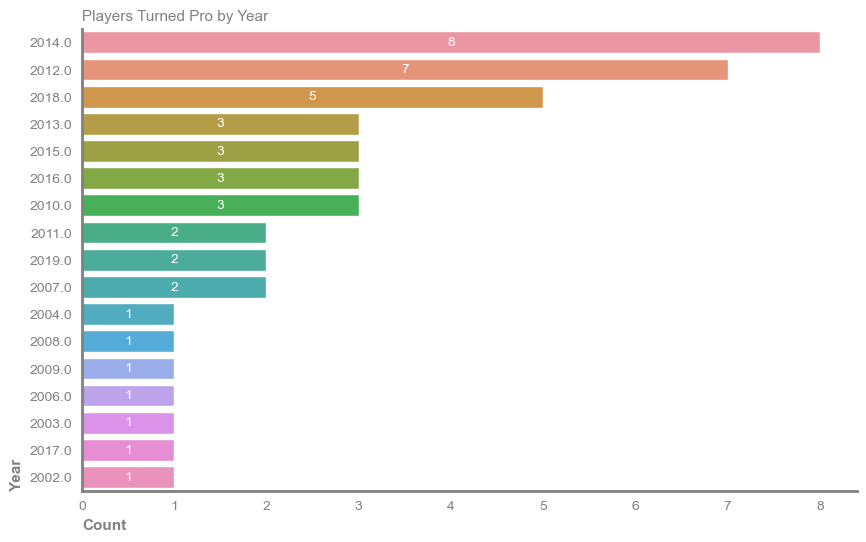

In [31]:
year_counts = df['turned_pro'].value_counts()
year_counts.sort_index()
data = {
    'Year': year_counts.index,
    'Count': year_counts.values
}
df_plot = pd.DataFrame(data)
sns.set_style("white")
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Count', y='Year', data=df_plot, orient='h', order=df_plot['Year'])
plt.title('Players Turned Pro by Year', color='grey', loc='left', fontsize=11)
plt.xlabel('Count', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Year', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
for bar, count in zip(bars.patches, df_plot['Count']):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{count}', 
             ha='center', va='center', color='white')

plt.show()


# Extra Q3: Which player owns each type of tennis court available in the dataset?

### Analysis: Determining Court Ownership by Winning Players

This code snippet analyzes the ownership of courts by winning players. It performs the following operations:

1. Grouping the DataFrame by 'winner_name' and 'ground_type', and calculating the size of each group.
2. Resetting the index of the resulting DataFrame and renaming the column containing the group sizes to 'count'.
3. Selecting the row with the highest count for each ground type.
4. Displaying the resulting DataFrame containing the winning player with the highest count for each ground type.

This analysis provides insights into which player has the most wins on each type of tennis court available in the dataset.


In [6]:
court_ownership = df.groupby(['winner_name', 'ground_type']).size().reset_index(name='count')
court_ownership = court_ownership.loc[court_ownership.groupby('ground_type')['count'].idxmax()]
court_ownership

,winner_name,ground_type,count
63,bouquier,Carpet indoor,1
415,ofner,Hardcourt indoor,3
380,morolli,Hardcourt outdoor,3
161,fernandez,Red clay,4
37,bartunkova,Synthetic outdoor,1


# Extra Q4: Is there a connection between starting the services and winning the match?

### This code snippet provides analyzes that can show Is there a connection between starting the services and winning the matchs:

1. Converting parquet dataset to csv to add new column that contain winner of each match_id games.
2. Load the created CSV dataset into a DataFrame.
3. Function to extract the winner's name based on winner_code and match_slug.
4. Create a new column 'Winner' with the winner's name for each match_id.
5. Create a new column 'first_to_serve_name' with the winner's name for each match_id
6. Replace empty values in 'first_to_serve_name' with a placeholder value
7. Drop rows where 'first_to_serve_name' is 'Unknown'
8. Calculate the percentage of rows where 'first_to_serve_name' win the match
9. Calculate the percentage of rows where 'first_to_serve_name' did not win the match

This analysis provides that Is there a connection between starting the services and winning the matchs.

In [7]:
def extract_winner(row):
    if row['winner_code'] == 2:
        return row['match_slug'].split('-')[0].strip()
    elif row['winner_code'] == 1:
        return row['match_slug'].split('-')[1].strip()
    else:
        return None
df['Winner_name'] = df.apply(extract_winner, axis=1)


def extract_first_set_starter(row):
    if row['first_to_serve'] == 1:
        return row['match_slug'].split('-')[0].strip()
    elif row['first_to_serve'] == 2:
        return row['match_slug'].split('-')[1].strip()
    else:
        return None

df['first_to_serve_name'] = df.apply(extract_first_set_starter, axis=1)
new_df = df.groupby('match_id').agg({'Winner_name': 'first', 'first_to_serve_name': 'first'}).reset_index()

new_df['first_to_serve_name'].fillna('Unknown', inplace=True)

new_df_cleaned = new_df[new_df['first_to_serve_name'] != 'Unknown']
new_df_cleaned.to_csv('filtered_data2.csv', index=False)

win_games_count = new_df_cleaned[new_df_cleaned['Winner_name'] == new_df_cleaned['first_to_serve_name']].shape[0]
win_games_percentage = (win_games_count / len(new_df_cleaned)) * 100

lose_game_count = new_df_cleaned[new_df_cleaned['Winner_name'] != new_df_cleaned['first_to_serve_name']].shape[0]
lose_game_percentage = (lose_game_count / len(new_df_cleaned)) * 100

print(f"The percentage of wins when a player start serves in the match is : {lose_game_percentage:.2f}%")
print(f"The percentage of losses when a player start serves in the match is : {win_games_percentage:.2f}%")

The percentage of wins when a player start serves in the match is : 57.89%
The percentage of losses when a player start serves in the match is : 42.11%


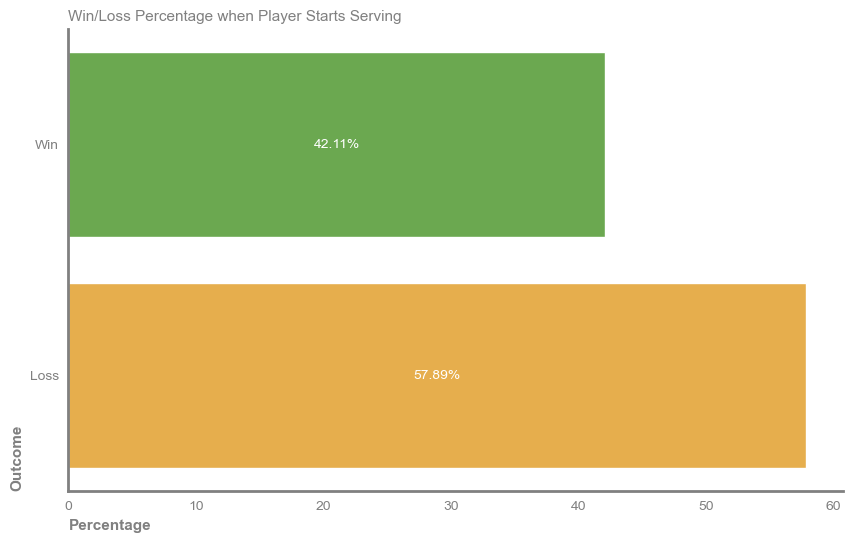

In [8]:
df = pd.read_csv('filtered_data2.csv')
win_games_count = df[df['Winner_name'] == df['first_to_serve_name']].shape[0]
win_games_percentage = (win_games_count / len(df)) * 100
lose_game_count = df[df['Winner_name'] != df['first_to_serve_name']].shape[0]
lose_game_percentage = (lose_game_count / len(df)) * 100
data = {
    'Outcome': ['Win', 'Loss'],
    'Percentage': [win_games_percentage, lose_game_percentage]
}
df_plot = pd.DataFrame(data)
colors = ['#65B741', '#FFB534']
sns.set_style("white")
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Percentage', y='Outcome', data=df_plot, palette=colors, orient='h')
plt.title('Win/Loss Percentage when Player Starts Serving', color='grey', loc='left', fontsize=11)
plt.xlabel('Percentage', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Outcome', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
for bar, percentage in zip(bars.patches, df_plot['Percentage']):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', 
             ha='center', va='center', color='white')
plt.show()


# Extra Q5: How does the home and away scores change over points, and how can this be visualized using a line plot?

### Analysis: Change in Cumulative Home and Away Scores Over Points

This code snippet plots the change in cumulative home and away scores over points in a match. It performs the following steps:

1. Extracts home and away scores from the DataFrame.
2. Calculates the cumulative home and away scores.
3. Generates points for plotting.
4. Plots the cumulative home and away scores against points.

The resulting plot provides insights into how the cumulative scores for both home and away teams change over the course of a match.


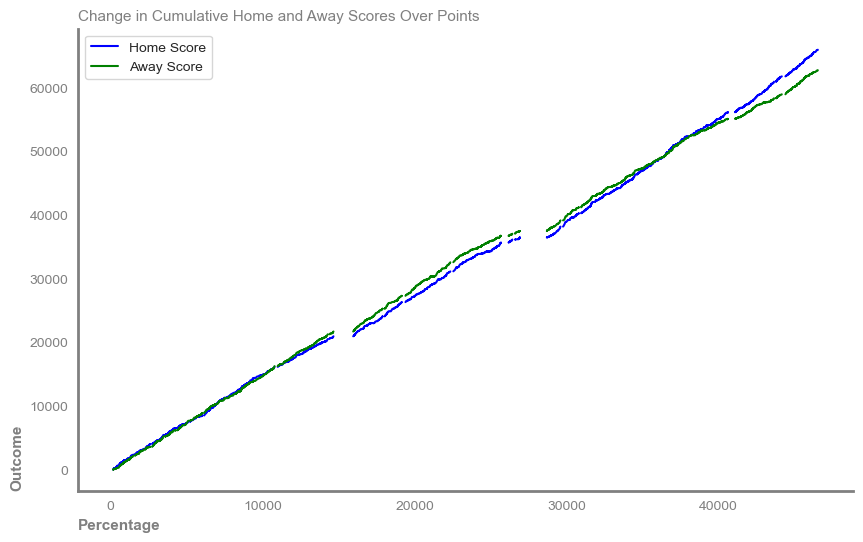

In [4]:
home_scores = df['home_score']
away_scores = df['away_score']

cumulative_home_scores = home_scores.cumsum()
cumulative_away_scores = away_scores.cumsum()
points = range(1, len(home_scores) + 1)

#Plotting
plt.figure(figsize=(10, 6))
sns.set_style("white")
plt.plot(points, cumulative_home_scores, label='Home Score', color='blue')
plt.plot(points, cumulative_away_scores, label='Away Score', color='green')
plt.xlabel('Points')
plt.ylabel('Cumulative Score')
plt.title('Change in Cumulative Home and Away Scores Over Points', color='grey', loc='left', fontsize=11)
plt.xlabel('Percentage', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Outcome', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.legend()
plt.show()


# Extra Q6: What is the Average height per continent

### This code snippet performs an analysis on the distribution of player heights by continent. It executes the following steps:

1. Removes rows with missing values in the 'height' and 'country' columns to ensure data integrity.
2. Maps country names to continents using the `pycountry_convert` library, which converts country names to continent names.
3. Calculates the number of players per continent.
4. Computes the average height of players for each continent.
5. Identifies the continent with the highest average height.

The resulting analysis provides insights into the distribution of player heights across different continents, highlighting the continent with the tallest average players.


In [5]:
df_drop_duplicates = df.dropna(subset=['height'])
df_drop_duplicates = df_drop_duplicates.dropna(subset=['country'])
df_drop_duplicates = df_drop_duplicates.drop_duplicates(subset=['full_name'])

# Function to get continent from country name using pycountry_convert
def get_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Map country names to continents using pycountry_convert
df_drop_duplicates['Continent'] = df_drop_duplicates['country'].apply(lambda x: get_continent(x))

# Calculate the number of players per continent
players_per_continent = df_drop_duplicates['Continent'].value_counts()
print("Number of players per continent:")
print(players_per_continent)

# Calculate the average height of players for each continent
average_height_per_continent = df_drop_duplicates.groupby('Continent')['height'].mean()
average_height_per_continent =average_height_per_continent.sort_values(ascending=False)
print("\nAverage height per continent:")
print(average_height_per_continent)

# Identify the continent with the highest average height
continent_with_highest_avg_height = average_height_per_continent.idxmax()
print(f"\nThe continent with the highest average height is: {continent_with_highest_avg_height}")


Number of players per continent:
Continent
Europe           179
South America     49
North America     41
Asia              33
Oceania           20
Africa            11
Name: count, dtype: int64

Average height per continent:
Continent
Africa           1.850909
Europe           1.838380
North America    1.832927
Oceania          1.816500
South America    1.813265
Asia             1.800303
Name: height, dtype: float64

The continent with the highest average height is: Africa


c:\Users\Mcc\anaconda3\lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\Mcc\anaconda3\lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


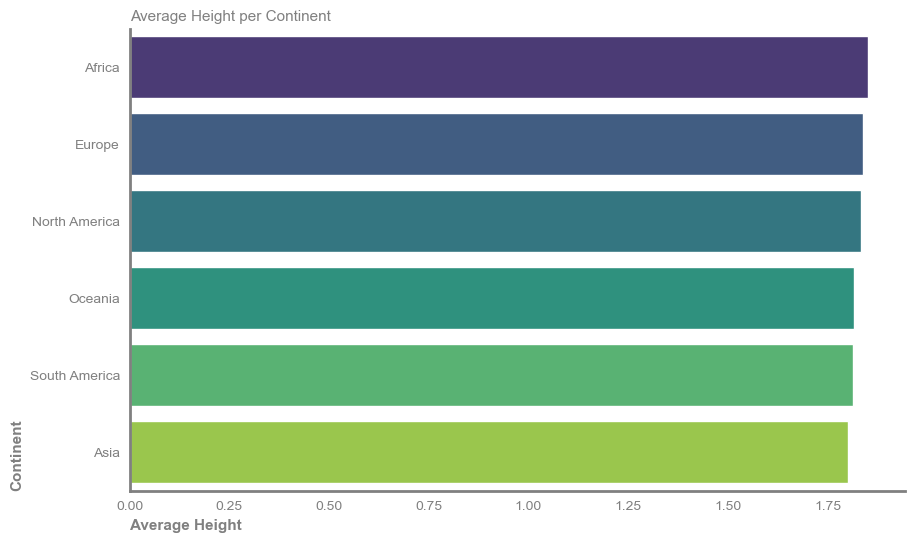

In [6]:
#Plotting
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=average_height_per_continent.values, y=average_height_per_continent.index, palette='viridis', dodge=False)
plt.xlabel('Average Height', fontsize=11, fontweight='bold', loc='left', color='grey')
plt.ylabel('Continent', fontsize=11, fontweight='bold', loc='bottom', color='grey')
plt.title('Average Height per Continent', color='grey', loc='left', fontsize=11)
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.show()

# Extra Q7: What is the distribution of heights along countires by gender?

### This code snippet calculates the average height of players grouped by country and gender. It performs the following steps:

1. Removes duplicate entries based on the 'name' column to ensure unique player records.
2. Groups the DataFrame by 'country' and 'gender'.
3. Calculates the mean height for each group.
4. Rounds the mean height to two decimal places.

The resulting DataFrame, `height`, contains the average height for each combination of country and gender.


In [7]:
df_uname = df.drop_duplicates(subset=['name'])
height = df_uname.groupby(['country', 'gender'], as_index=False)['height'].mean().round(2)


c:\Users\Mcc\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


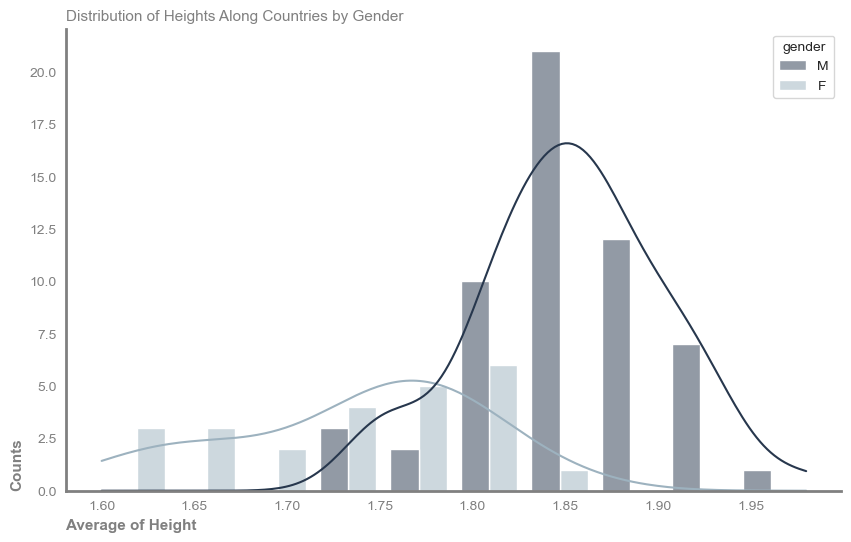

In [8]:
#Plotting
df_plot = pd.DataFrame(height)
sns.set_style("white")
plt.figure(figsize=(10, 6))
bars = sns.histplot(data=df_plot, x='height',hue="gender", bins=10, kde=True, multiple="dodge", shrink=.8, palette=['#27374D','#9DB2BF' ])
plt.title('Distribution of Heights Along Countries by Gender', color='grey', loc='left', fontsize=11)
plt.xlabel('Average of Height', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Counts', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
plt.show()

# Extra Q8: Whats the Average height of players based on countries ?

### This code snippet calculates the average height of players grouped by country. It executes the following steps:

1. Removes duplicate entries based on the 'name' column to ensure unique player records.
2. Groups the DataFrame by 'country'.
3. Calculates the mean height for each country.
4. Rounds the mean height to two decimal places.
5. Drops any rows with missing values.
6. Sorts the DataFrame by average height in descending order.

The resulting DataFrame, `height_country`, displays the top countries with the highest average height of players.


In [9]:
df_uname = df.drop_duplicates(subset=['name'])
height_country = df_uname.groupby(['country'], as_index=False)['height'].mean().round(2)
height_country = height_country.dropna().sort_values(by=['height'], ascending=False)
height_country.head()

,country,height
69,Zimbabwe,1.98
18,Dominican Republic,1.93
54,South Africa,1.93
39,Monaco,1.93
0,Algeria,1.93


c:\Users\Mcc\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


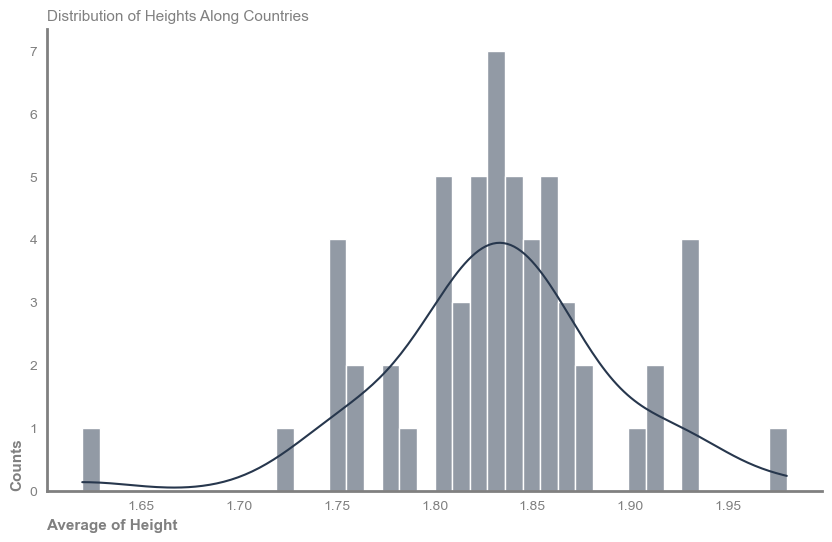

In [10]:
#Plotting
df_plot = pd.DataFrame(height_country)
sns.set_style("white")
plt.figure(figsize=(10, 6))
bars = sns.histplot(data=df_plot, x='height', bins=40, kde=True,  color='#27374D')
plt.title('Distribution of Heights Along Countries', color='grey', loc='left', fontsize=11)
plt.xlabel('Average of Height', color='grey', fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Counts', color='grey', fontsize=11, fontweight='bold', loc='bottom')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(2)
sns.despine()
plt.gcf().set_facecolor('white')
plt.show()